In [1]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
import warnings

In [2]:
#训练数据和测试数据的读取
train_data = pd.read_csv("E:/桌面/Data/bike-sharing-demand/train.csv")
test_data = pd.read_csv("E:/桌面/Data/bike-sharing-demand/test.csv")


In [3]:
#查看训练数据概况
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
train_data.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

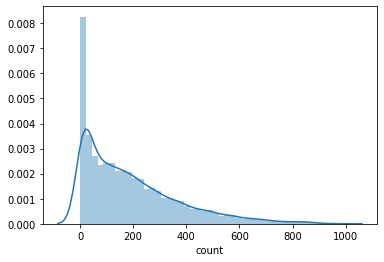

In [5]:
#查看数据分布
sns.distplot(train_data['count'])

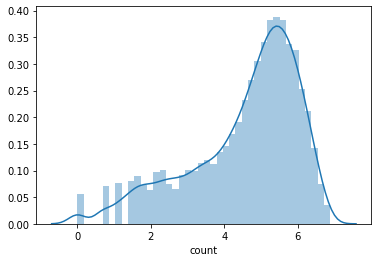

In [6]:
#查看log处理后的数据分布
train_data['count']=train_data['count'].apply(lambda x:np.log(x))
sns.distplot(train_data['count'])

In [7]:
#信息拆分工作 将datetime拆分 一直到到小时
train_data["data"] = train_data.datetime.apply(lambda x : x.split()[0])
train_data["hour"] = train_data.datetime.apply(lambda x : x.split()[1].split(":")[0])
train_data["month"] = train_data.data.apply(lambda x: x.split()[0][5:7])
train_data["weekday"] = train_data.data.apply(lambda dataString : calendar.day_name[datetime.strptime(dataString,"%Y-%m-%d").weekday()])
train_data.drop('datetime', axis = 1, inplace = True)
train_data.drop('data', axis = 1, inplace = True)

In [8]:
test_data["data"] = test_data.datetime.apply(lambda x : x.split()[0])
test_data["hour"] = test_data.datetime.apply(lambda x : x.split()[1].split(":")[0])
test_data["month"] = test_data.data.apply(lambda x: x.split()[0][5:7])
test_data["weekday"] = test_data.data.apply(lambda dataString : calendar.day_name[datetime.strptime(dataString,"%Y-%m-%d").weekday()])
test_data.drop('datetime', axis = 1, inplace = True)
test_data.drop('data', axis = 1, inplace = True)

In [9]:
train_data.head()

season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   casual  registered     count hour month   weekday  
0       3          13  2.772589   00    01  Saturday  
1       8          32  3.688879   01    01  Saturday  
2       5          27  3.465736   02    01  Saturday  
3       3          10  2.564949   03    01  Saturday  
4       0           1  0.000000   04    01  Saturday

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Month'),
 Text(0.5, 1.0, 'Box Plot On Count Across Month')]

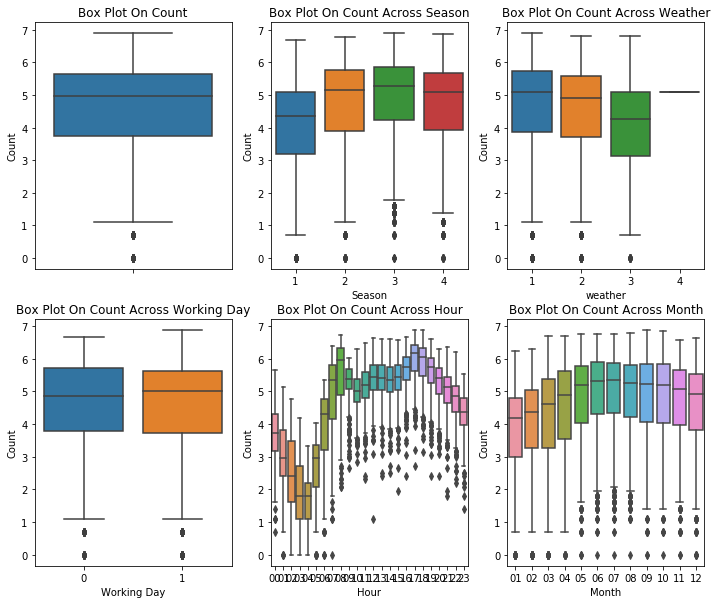

In [10]:
#异常值处理
fig, axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(12, 10)
sns.boxplot(data=train_data,y="count",orient="v",ax=axes[0][0])
sns.boxplot(data=train_data,y="count",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=train_data,y="count",x="weather",orient="v",ax=axes[0][2])
sns.boxplot(data=train_data,y="count",x="workingday",orient="v",ax=axes[1][0])
sns.boxplot(data=train_data,y="count",x="hour",orient="v",ax=axes[1][1])
sns.boxplot(data=train_data,y="count",x="month",orient="v",ax=axes[1][2]) 
axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[0][2].set(xlabel='weather', ylabel='Count',title="Box Plot On Count Across Weather")
axes[1][0].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")
axes[1][1].set(xlabel='Hour', ylabel='Count',title="Box Plot On Count Across Hour")
axes[1][2].set(xlabel='Month', ylabel='Count',title="Box Plot On Count Across Month")

In [11]:
#近似正态分布处理异常值 超过均值3倍标准差视为异常值
train_data = train_data[np.abs(train_data["count"]-train_data["count"].mean())<=(3*train_data["count"].std())]
train_data

season  holiday  workingday  weather   temp   atemp  humidity  \
0           1        0           0        1   9.84  14.395        81   
1           1        0           0        1   9.02  13.635        80   
2           1        0           0        1   9.02  13.635        80   
3           1        0           0        1   9.84  14.395        75   
6           1        0           0        1   9.02  13.635        80   
...       ...      ...         ...      ...    ...     ...       ...   
10881       4        0           1        1  15.58  19.695        50   
10882       4        0           1        1  14.76  17.425        57   
10883       4        0           1        1  13.94  15.910        61   
10884       4        0           1        1  13.94  17.425        61   
10885       4        0           1        1  13.12  16.665        66   

       windspeed  casual  registered     count hour month    weekday  
0         0.0000       3          13  2.772589   00    01   Saturday  
1         0.0000       8          32  3.688879   01    01   Saturday  
2         0.0000       5          27  3.465736   02    01   Saturday  
3         0.0000       3          10  2.564949   03    01   Saturday  
6         0.0000       2           0  0.693147   06    01   Saturday  
...          ...     ...         ...       ...  ...   ...        ...  
10881    26.0027       7         329  5.817111   19    12  Wednesday  
10882    15.0013      10         231  5.484797   20    12  Wednesday  
10883    15.0013       4         164  5.123964   21    12  Wednesday  
10884     6.0032      12         117  4.859812   22    12  Wednesday  
10885     8.9981       4          84  4.477337   23    12  Wednesday  

[10781 rows x 14 columns]

1. 季节与租车数量的关系

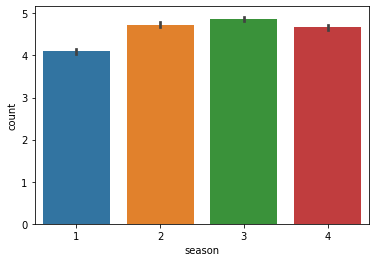

In [12]:
sns.barplot(x = 'season' , y = 'count',data = train_data)##barplot()——绘制条形图

2. 是否为假期和租车数量的关系

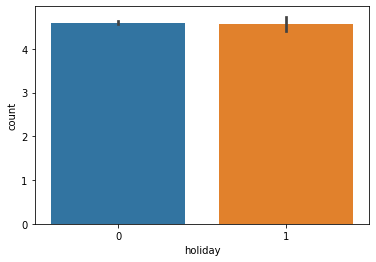

In [13]:
sns.barplot(x = 'holiday' , y = 'count',data = train_data)

3. 是否为工作日和租车数量的关系

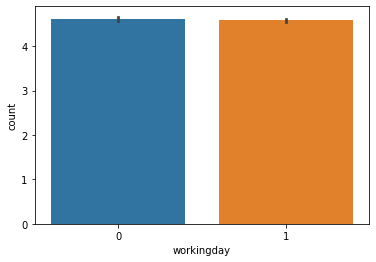

In [14]:
sns.barplot(x = 'workingday' , y = 'count',data = train_data)

4. 天气和租车数量的关系

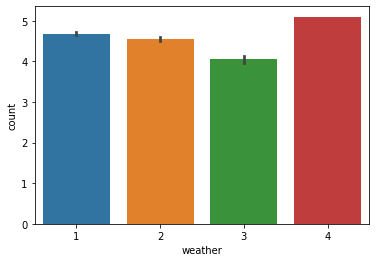

In [15]:
sns.barplot(x = 'weather' , y = 'count',data = train_data)

5. 每天的时间与租车数量的关系

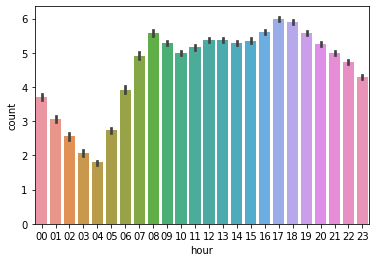

In [16]:
sns.barplot(x = 'hour' , y = 'count',data = train_data)

6. 月份与租赁数量的关系

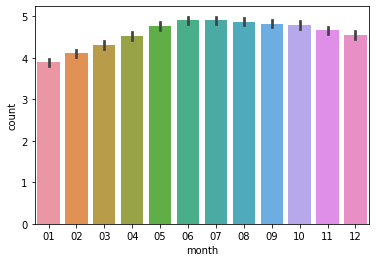

In [17]:
sns.barplot(x = 'month' , y = 'count',data = train_data)

In [19]:
'''
#训练集风速为0的值用随机森林拟合出来
from sklearn.ensemble import RandomForestRegressor

Wind_test = train_data[train_data["windspeed"]==0]
Wind_train = train_data[train_data["windspeed"]!=0]
rf = RandomForestRegressor()
windColumns = ["season","weather","humidity","month","temp","atemp", "month", "hour"]
rf.fit(Wind_train[windColumns], Wind_train["windspeed"])
 
predict = rf.predict(Wind_test[windColumns])
Wind_test["windspeed"] = predict
train_data = Wind_test.append(Wind_train)
train_data.reset_index(inplace=True)
train_data.drop('index',inplace=True,axis=1)
'''

'\nfrom sklearn.ensemble import RandomForestRegressor\n\nWind_test = train_data[train_data["windspeed"]==0]\nWind_train = train_data[train_data["windspeed"]!=0]\nrf = RandomForestRegressor()\nwindColumns = ["season","weather","humidity","month","temp","atemp", "month", "hour"]\nrf.fit(Wind_train[windColumns], Wind_train["windspeed"])\n \npredict = rf.predict(Wind_test[windColumns])\nWind_test["windspeed"] = predict\ntrain_data = Wind_test.append(Wind_train)\ntrain_data.reset_index(inplace=True)\ntrain_data.drop(\'index\',inplace=True,axis=1)\n'

In [20]:
'''
Wind_test = test_data[test_data["windspeed"]==0]
Wind_train = test_data[test_data["windspeed"]!=0]
rf = RandomForestRegressor()
windColumns = ["season","weather","humidity","month","temp","atemp", "month", "hour"]
rf.fit(Wind_train[windColumns], Wind_train["windspeed"])
 
predict = rf.predict(Wind_test[windColumns])
Wind_test["windspeed"] = predict
test_data = Wind_test.append(Wind_train)
test_data.reset_index(inplace=True)
test_data.drop('index',inplace=True,axis=1)
'''

'\nWind_test = test_data[test_data["windspeed"]==0]\nWind_train = test_data[test_data["windspeed"]!=0]\nrf = RandomForestRegressor()\nwindColumns = ["season","weather","humidity","month","temp","atemp", "month", "hour"]\nrf.fit(Wind_train[windColumns], Wind_train["windspeed"])\n \npredict = rf.predict(Wind_test[windColumns])\nWind_test["windspeed"] = predict\ntest_data = Wind_test.append(Wind_train)\ntest_data.reset_index(inplace=True)\ntest_data.drop(\'index\',inplace=True,axis=1)\n'

In [21]:
#将离散数据进行one-hot编码
final_df = train_data
weather_df=pd.get_dummies(final_df['weather'],prefix='w',drop_first=True)
month_df=pd.get_dummies(final_df['month'],prefix='m',drop_first=True)
hour_df=pd.get_dummies(final_df['hour'],prefix='h',drop_first=True)
season_df=pd.get_dummies(final_df['season'],prefix='s',drop_first=True)
day_df=pd.get_dummies(final_df['weekday'],prefix='d',drop_first=True)

final_df=final_df.drop(['weather','month','hour','season','weekday','casual','registered'], axis=1)

final_df=final_df.join(weather_df)
final_df=final_df.join(month_df)                     
final_df=final_df.join(hour_df)
final_df=final_df.join(season_df)
final_df=final_df.join(day_df)


In [22]:
train_data = final_df
train_data.head()

holiday  workingday  temp   atemp  humidity  windspeed     count  w_2  w_3  \
0        0           0  9.84  14.395        81        0.0  2.772589    0    0   
1        0           0  9.02  13.635        80        0.0  3.688879    0    0   
2        0           0  9.02  13.635        80        0.0  3.465736    0    0   
3        0           0  9.84  14.395        75        0.0  2.564949    0    0   
6        0           0  9.02  13.635        80        0.0  0.693147    0    0   

   w_4  ...  h_23  s_2  s_3  s_4  d_Monday  d_Saturday  d_Sunday  d_Thursday  \
0    0  ...     0    0    0    0         0           1         0           0   
1    0  ...     0    0    0    0         0           1         0           0   
2    0  ...     0    0    0    0         0           1         0           0   
3    0  ...     0    0    0    0         0           1         0           0   
6    0  ...     0    0    0    0         0           1         0           0   

   d_Tuesday  d_Wednesday  
0          0            0  
1          0            0  
2          0            0  
3          0            0  
6          0            0  

[5 rows x 53 columns]

In [23]:
final_df = test_data
weather_df=pd.get_dummies(final_df['weather'],prefix='w',drop_first=True)
month_df=pd.get_dummies(final_df['month'],prefix='m',drop_first=True)
hour_df=pd.get_dummies(final_df['hour'],prefix='h',drop_first=True)
season_df=pd.get_dummies(final_df['season'],prefix='s',drop_first=True)
day_df=pd.get_dummies(final_df['weekday'],prefix='d',drop_first=True)

final_df=final_df.drop(['weather','month','hour','season','weekday'], axis=1)

final_df=final_df.join(weather_df)
final_df=final_df.join(month_df)                     
final_df=final_df.join(hour_df)
final_df=final_df.join(season_df)
final_df=final_df.join(day_df)


In [24]:
test_data = final_df

In [25]:
test_data.head()

holiday  workingday   temp   atemp  humidity  windspeed  w_2  w_3  w_4  \
0        0           1  10.66  11.365        56    26.0027    0    0    0   
1        0           1  10.66  13.635        56     0.0000    0    0    0   
2        0           1  10.66  13.635        56     0.0000    0    0    0   
3        0           1  10.66  12.880        56    11.0014    0    0    0   
4        0           1  10.66  12.880        56    11.0014    0    0    0   

   m_02  ...  h_23  s_2  s_3  s_4  d_Monday  d_Saturday  d_Sunday  d_Thursday  \
0     0  ...     0    0    0    0         0           0         0           1   
1     0  ...     0    0    0    0         0           0         0           1   
2     0  ...     0    0    0    0         0           0         0           1   
3     0  ...     0    0    0    0         0           0         0           1   
4     0  ...     0    0    0    0         0           0         0           1   

   d_Tuesday  d_Wednesday  
0          0            0  
1          0            0  
2          0            0  
3          0            0  
4          0            0  

[5 rows x 52 columns]

In [26]:
#训练集、测试集的划分
train_data11 = train_data.iloc[:,train_data.columns!='count'].values
train_target11 = train_data['count'].values
#Initializing training set
test_data1 = test_data.iloc[:,test_data.columns!='count'].values

In [27]:
test_data1

array([[ 0.  ,  1.  , 10.66, ...,  1.  ,  0.  ,  0.  ],
       [ 0.  ,  1.  , 10.66, ...,  1.  ,  0.  ,  0.  ],
       [ 0.  ,  1.  , 10.66, ...,  1.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  1.  , 10.66, ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  1.  , 10.66, ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  1.  , 10.66, ...,  0.  ,  0.  ,  0.  ]])

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [29]:
#训练集中再分割出部分验证集
train_data1,val_data,train_target,val_target= train_test_split(train_data11,train_target11,test_size = 0.2, shuffle = True)

In [3]:
#评价指标
def RMSLE(y_true, y_predict):
    result = 0
    for i in range(len(y_true)):
        result += ((np.log(np.exp(y_true[i]) + 1) - np.log(np.exp(y_predict[i]) + 1))**2)
    result = result / len(y_true)
    return np.sqrt(result)

In [31]:

my_scorer = make_scorer(RMSLE, greater_is_better= False)
scoring = { 'RMSLE': my_scorer}
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [38]:
#决策树
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
dtm = DecisionTreeRegressor()
param_grid = {"criterion": ["mse", "mae"]}
search = GridSearchCV(dtm, param_grid, scoring= my_scorer, cv = 10, n_jobs = -1, verbose = 1)
DT_results = search.fit(train_data1, train_target)
print(search.cv_results_['mean_test_score'])
print('RMSLE: %.6f' % DT_results.best_score_)
print('Config: %s' % DT_results.best_params_)
print('RMSLE on val: %.6f' % (RMSLE(DT_results.predict(val_data), val_target)))

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[-0.65382007 -0.6850776 ]
RMSLE: -0.653820
Config: {'criterion': 'mse'}
RMSLE on val: 0.661941


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   21.0s finished


In [32]:
#随机森林

rf = RandomForestRegressor()
rf.fit(train_data1, train_target)
param_grid = {'n_estimators':[2000]}
search = GridSearchCV(rf, param_grid, scoring= my_scorer, cv = 5, n_jobs = -1, verbose = 1)
RF_results = search.fit(train_data1, train_target)
print(search.cv_results_['mean_test_score'])
print('RMSLE: %.6f' % RF_results.best_score_)
print('Config: %s' % RF_results.best_params_)
print('RMSLE on val: %.6f' % (RMSLE(RF_results.predict(val_data), val_target)))



Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.6min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.6min finished


[-0.47737655]
RMSLE: -0.477377
Config: {'n_estimators': 2000}
RMSLE on val: 0.447562


In [33]:
RF_results = search.fit(train_data11, train_target11)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.0min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.1min finished


In [34]:
#GBDT
gbm = GradientBoostingRegressor(n_estimators=4000,learning_rate = 0.1) ### Test 0.41
gbm.fit(train_data11,train_target11)
print(RMSLE(gbm.predict(val_data), val_target))

0.2779814372335142


In [42]:
#AdaBoost回归
ad = AdaBoostRegressor()
ad.fit(train_data1,train_target)
print(RMSLE(ad.predict(val_data), val_target))

1.059961983654936


In [2]:
#线性回归
from sklearn import linear_model
LinearRegression = linear_model.LinearRegression()
param_grid = {'fit_intercept':['True', 'False'],'normalize':['False', 'True']}
search = GridSearchCV(LinearRegression, param_grid, scoring= 'neg_mean_squared_error', cv= 10, n_jobs = -1, verbose = 1)
LR_results = search.fit(train_data1, train_target)
print(search.cv_results_['mean_test_score'])
print('RMSLE: %.6f' % LR_results.best_score_)
print('Config: %s' % LR_results.best_params_)
print('RMSLE on val: %.6f' % (RMSLE(LR_results.predict(val_data), val_target)))

ModuleNotFoundError: No module named 'sklearn'

In [35]:
#预测结果的输出和保存
out_data = pd.read_csv("E:/桌面/Data/bike-sharing-demand/test.csv")
out_data["datatime"] = out_data.datetime.apply(lambda x : x.split()[0])
out_data['count'] = np.exp(gbm.predict(test_data1))
out_data = out_data[['datetime', 'count']]
print(out_data)

out_data.to_csv('E:/桌面/best_submission.csv', index = False)

                 datetime       count
0     2011-01-20 00:00:00   22.068475
1     2011-01-20 01:00:00    7.013463
2     2011-01-20 02:00:00    4.704422
3     2011-01-20 03:00:00    3.964687
4     2011-01-20 04:00:00    2.733790
...                   ...         ...
6488  2012-12-31 19:00:00  189.405116
6489  2012-12-31 20:00:00   95.584155
6490  2012-12-31 21:00:00   74.661455
6491  2012-12-31 22:00:00   50.603741
6492  2012-12-31 23:00:00   28.263938

[6493 rows x 2 columns]
